# Reinforcement Learning Application for CryBot

In [ ]:
#!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 
!pip install --upgrade --no-deps --force-reinstall https://github.com/AminHP/gym-anytrading/archive/master.zip
!pip install stable-baselines3
!pip install gym
clear_output()

In [2]:
"""Assuming the following packages are installed:"""
from IPython.display import clear_output
clear_output()

from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import seaborn as sns
import pandas as pd
import numpy as np

#
from talib import SMA,MACD,RSI,BBANDS,STOCH

# Gym stuff
#Need to replace this with a more robust model.
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C,PPO

In [1]:
#Read in historical data.
eth  = pq.read_table('ETH-USDT.parquet').to_pandas()

#Assign proper timestamp & indexing.
eth['open_time_epoch'] = pd.to_datetime(eth.index, unit='ms')

#Numerize all data.
eth = eth.apply(pd.to_numeric)

#Plot all DOGE data.
plt.figure(figsize=(20,8))
plt.plot(eth.index,eth.close)
plt.title('ETH-USDT')

NameError: name 'pq' is not defined

In [4]:
eth.rename(columns={'open': 'Open', 'high': 'High', 'low':'Low', 'close':'Close', 'volume':'Volume', 'quote_asset_volume':'Quote_asset_volume',
       'number_of_trades':'Number_of_trades', 'taker_buy_base_asset_volume':'Taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume':'Taker_buy_quote_asset_volume', 'open_time_epoch':'Open_time_epoch'}, inplace=True)

In [5]:
env = gym.make('stocks-v0', df=eth, frame_bound=(5,1000), window_size=5)

In [6]:
env.signal_features

array([[301.13      ,   0.        ],
       [301.13      ,   0.        ],
       [300.        ,  -1.1300049 ],
       ...,
       [301.44      ,   0.        ],
       [302.        ,   0.55999756],
       [302.        ,   0.        ]], dtype=float32)

info {'total_reward': 4.09979248046875, 'total_profit': 0.02146486781189478, 'position': 1}


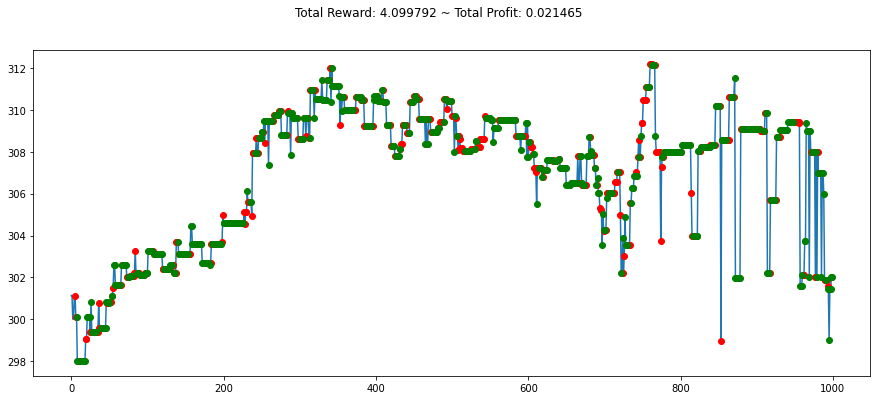

In [15]:
#Sample space
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# Apply indicators 

In [16]:
!pip install finta
clear_output()

In [17]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [21]:
eth['SMA'] = TA.SMA(eth, 12)
eth['RSI'] = TA.RSI(eth)
eth['OBV'] = TA.OBV(eth)
eth.fillna(0, inplace=True)

In [22]:
#Create new env's
df = eth
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [23]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [24]:
#Build environment & train
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [35]:
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 3.89     |
| time/                 |          |
|    fps                | 1161     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.568   |
|    explained_variance | -48.5    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.066   |
|    value_loss         | 0.0143   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 2.81     |
| time/                 |          |
|    fps                | 1221     |
|    iterations         | 200      |
|    time_elapsed 

In [36]:
#Evaluation
env = MyCustomEnv(df=df, window_size=12, frame_bound=(80,250))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -0.940032958984375, 'total_profit': 0.6537741314893436, 'position': 0}


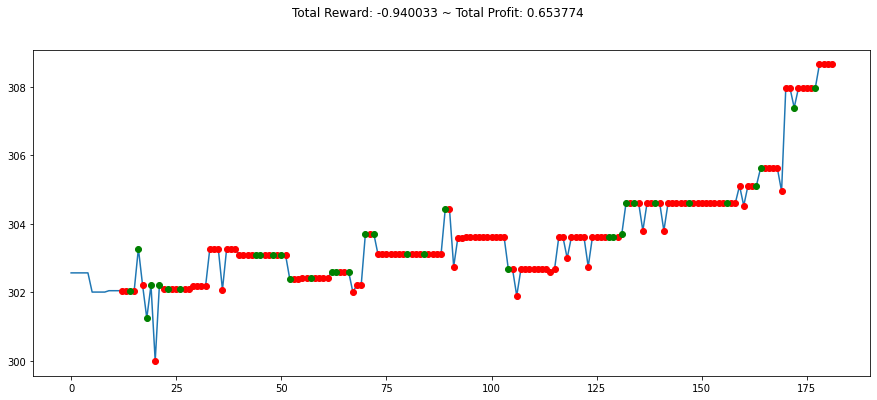

In [39]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [40]:
#En fin

#Part Time Larry: https://github.com/hackingthemarkets/supertrend-crypto-bot

#Something to check out: https://www.youtube.com/watch?v=lM37E4Z9d2s
#GitHub: https://github.com/pythonlessons/RL-Bitcoin-trading-bot

# PyLessons Method
Decomposed for analysis.

In [3]:
"""Assuming the following packages are installed:"""
from IPython.display import clear_output
clear_output()

from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import seaborn as sns
import pandas as pd
import numpy as np

In [10]:
# First upload dataframe as df
#Read in historical data.
df  = pq.read_table('DOGE-USDT.parquet').to_pandas().reset_index(drop=False)
df = df.set_index('open_time')['close'].resample('1h').ohlc()




df#.reset_index(drop=False)
#df#.rename(columns={'open_time':'Date','open': 'Open', 'high': 'High', 'low':'Low', 'close':'Close', 'volume':'Volume'}, inplace=True)
#df

,open,high,low,close
open_time,,,,
2019-07-05 12:00:00,0.004200,0.004475,0.003781,0.003925
2019-07-05 13:00:00,0.003926,0.003926,0.003765,0.003835
2019-07-05 14:00:00,0.003829,0.003919,0.003820,0.003841
2019-07-05 15:00:00,0.003840,0.003869,0.003710,0.003738
2019-07-05 16:00:00,0.003727,0.003727,0.003643,0.003666
...,...,...,...,...
2020-12-29 19:00:00,0.004434,0.004469,0.004398,0.004436
2020-12-29 20:00:00,0.004441,0.004444,0.004418,0.004426
2020-12-29 21:00:00,0.004426,0.004469,0.004419,0.004445


In [ ]:
pd.merge(pq.read_table('DOGE-USDT.parquet').to_pandas(),df)#['volume']

In [6]:
!pip install mplfinance
clear_output()

In [5]:
#================================================================
#
#   File name   : RL-Bitcoin-trading-bot_7.py
#   Author      : PyLessons
#   Created date: 2021-02-25
#   Website     : https://pylessons.com/
#   GitHub      : https://github.com/pythonlessons/RL-Bitcoin-trading-bot
#   Description : Trading Crypto with Reinforcement Learning #7
#
#================================================================
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import copy
import pandas as pd
import numpy as np
import random
from collections import deque
from tensorboardX import SummaryWriter
from tensorflow.keras.optimizers import Adam, RMSprop
from model import Actor_Model, Critic_Model, Shared_Model
from utils import TradingGraph, Write_to_file, Normalizing
import matplotlib.pyplot as plt
from datetime import datetime
from indicators import *
from multiprocessing_env import train_multiprocessing, test_multiprocessing
import json

In [6]:
class CustomAgent:
    # A custom Bitcoin trading agent
    def __init__(self, lookback_window_size=50, lr=0.00005, epochs=1, optimizer=Adam, batch_size=32, model="", depth=0, comment=""):
        self.lookback_window_size = lookback_window_size
        self.model = model
        self.comment = comment
        self.depth = depth
        
        # Action space from 0 to 3, 0 is hold, 1 is buy, 2 is sell
        self.action_space = np.array([0, 1, 2])

        # folder to save models
        self.log_name = datetime.now().strftime("%Y_%m_%d_%H_%M")+"_Crypto_trader"
        
        # State size contains Market+Orders+Indicators history for the last lookback_window_size steps
        self.state_size = (lookback_window_size, 5+depth) # 5 standard OHCL information + market and indicators

        # Neural Networks part bellow
        self.lr = lr
        self.epochs = epochs
        self.optimizer = optimizer
        self.batch_size = batch_size

        # Create shared Actor-Critic network model
        self.Actor = self.Critic = Shared_Model(input_shape=self.state_size, action_space = self.action_space.shape[0], lr=self.lr, optimizer = self.optimizer, model=self.model)
        # Create Actor-Critic network model
        #self.Actor = Actor_Model(input_shape=self.state_size, action_space = self.action_space.shape[0], lr=self.lr, optimizer = self.optimizer)
        #self.Critic = Critic_Model(input_shape=self.state_size, action_space = self.action_space.shape[0], lr=self.lr, optimizer = self.optimizer)
        
    # create tensorboard writer
    def create_writer(self, initial_balance, normalize_value, train_episodes):
        self.replay_count = 0
        self.writer = SummaryWriter('runs/'+self.log_name)

        # Create folder to save models
        if not os.path.exists(self.log_name):
            os.makedirs(self.log_name)

        self.start_training_log(initial_balance, normalize_value, train_episodes)
            
    def start_training_log(self, initial_balance, normalize_value, train_episodes):      
        # save training parameters to Parameters.json file for future
        current_date = datetime.now().strftime('%Y-%m-%d %H:%M')
        params = {
            "training start": current_date,
            "initial balance": initial_balance,
            "training episodes": train_episodes,
            "lookback window size": self.lookback_window_size,
            "depth": self.depth,
            "lr": self.lr,
            "epochs": self.epochs,
            "batch size": self.batch_size,
            "normalize value": normalize_value,
            "model": self.model,
            "comment": self.comment,
            "saving time": "",
            "Actor name": "",
            "Critic name": "",
        }
        with open(self.log_name+"/Parameters.json", "w") as write_file:
            json.dump(params, write_file, indent=4)


    def get_gaes(self, rewards, dones, values, next_values, gamma = 0.99, lamda = 0.95, normalize=True):
        deltas = [r + gamma * (1 - d) * nv - v for r, d, nv, v in zip(rewards, dones, next_values, values)]
        deltas = np.stack(deltas)
        gaes = copy.deepcopy(deltas)
        for t in reversed(range(len(deltas) - 1)):
            gaes[t] = gaes[t] + (1 - dones[t]) * gamma * lamda * gaes[t + 1]

        target = gaes + values
        if normalize:
            gaes = (gaes - gaes.mean()) / (gaes.std() + 1e-8)
        return np.vstack(gaes), np.vstack(target)

    def replay(self, states, actions, rewards, predictions, dones, next_states):
        # reshape memory to appropriate shape for training
        states = np.vstack(states)
        next_states = np.vstack(next_states)
        actions = np.vstack(actions)
        predictions = np.vstack(predictions)

        # Get Critic network predictions 
        values = self.Critic.critic_predict(states)
        next_values = self.Critic.critic_predict(next_states)
        
        # Compute advantages
        advantages, target = self.get_gaes(rewards, dones, np.squeeze(values), np.squeeze(next_values))
        '''
        plt.plot(target,'-')
        plt.plot(advantages,'.')
        ax=plt.gca()
        ax.grid(True)
        plt.show()
        '''
        # stack everything to numpy array
        y_true = np.hstack([advantages, predictions, actions])
        
        # training Actor and Critic networks
        a_loss = self.Actor.Actor.fit(states, y_true, epochs=self.epochs, verbose=0, shuffle=True, batch_size=self.batch_size)
        c_loss = self.Critic.Critic.fit(states, target, epochs=self.epochs, verbose=0, shuffle=True, batch_size=self.batch_size)

        self.writer.add_scalar('Data/actor_loss_per_replay', np.sum(a_loss.history['loss']), self.replay_count)
        self.writer.add_scalar('Data/critic_loss_per_replay', np.sum(c_loss.history['loss']), self.replay_count)
        self.replay_count += 1

        return np.sum(a_loss.history['loss']), np.sum(c_loss.history['loss'])

    def act(self, state):
        # Use the network to predict the next action to take, using the model
        prediction = self.Actor.actor_predict(np.expand_dims(state, axis=0))[0]
        action = np.random.choice(self.action_space, p=prediction)
        return action, prediction
        
    def save(self, name="Crypto_trader", score="", args=[]):
        # save keras model weights
        self.Actor.Actor.save_weights(f"{self.log_name}/{score}_{name}_Actor.h5")
        self.Critic.Critic.save_weights(f"{self.log_name}/{score}_{name}_Critic.h5")

        # update json file settings
        if score != "":
            with open(self.log_name+"/Parameters.json", "r") as json_file:
                params = json.load(json_file)
            params["saving time"] = datetime.now().strftime('%Y-%m-%d %H:%M')
            params["Actor name"] = f"{score}_{name}_Actor.h5"
            params["Critic name"] = f"{score}_{name}_Critic.h5"
            with open(self.log_name+"/Parameters.json", "w") as write_file:
                json.dump(params, write_file, indent=4)

        # log saved model arguments to file
        if len(args) > 0:
            with open(f"{self.log_name}/log.txt", "a+") as log:
                current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                arguments = ""
                for arg in args:
                    arguments += f", {arg}"
                log.write(f"{current_time}{arguments}\n")

    def load(self, folder, name):
        # load keras model weights
        self.Actor.Actor.load_weights(os.path.join(folder, f"{name}_Actor.h5"))
        self.Critic.Critic.load_weights(os.path.join(folder, f"{name}_Critic.h5"))

In [7]:
class CustomEnv:
    # A custom Bitcoin trading environment
    def __init__(self, df, df_normalized, initial_balance=1000, lookback_window_size=50, Render_range=100, Show_reward=False, Show_indicators=False, normalize_value=40000):
        # Define action space and state size and other custom parameters
        self.df = df.reset_index()#.reset_index()#.dropna().copy().reset_index()
        self.df_normalized = df_normalized.reset_index()#.reset_index()#.copy().dropna().reset_index()
        self.df_total_steps = len(self.df)-1
        self.initial_balance = initial_balance
        self.lookback_window_size = lookback_window_size
        self.Render_range = Render_range # render range in visualization
        self.Show_reward = Show_reward # show order reward in rendered visualization
        self.Show_indicators = Show_indicators # show main indicators in rendered visualization

        # Orders history contains the balance, net_worth, crypto_bought, crypto_sold, crypto_held values for the last lookback_window_size steps
        self.orders_history = deque(maxlen=self.lookback_window_size)
        
        # Market history contains the OHCL values for the last lookback_window_size prices
        self.market_history = deque(maxlen=self.lookback_window_size)

        self.normalize_value = normalize_value

        self.fees = 0.001 # default Binance 0.1% order fees

        self.columns = list(self.df_normalized.columns[2:])

    # Reset the state of the environment to an initial state
    def reset(self, env_steps_size = 0):
        self.visualization = TradingGraph(Render_range=self.Render_range, Show_reward=self.Show_reward, Show_indicators=self.Show_indicators) # init visualization
        self.trades = deque(maxlen=self.Render_range) # limited orders memory for visualization
        
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.prev_net_worth = self.initial_balance
        self.crypto_held = 0
        self.crypto_sold = 0
        self.crypto_bought = 0
        self.episode_orders = 0 # track episode orders count
        self.prev_episode_orders = 0 # track previous episode orders count
        self.rewards = deque(maxlen=self.Render_range)
        self.env_steps_size = env_steps_size
        self.punish_value = 0
        if env_steps_size > 0: # used for training dataset
            self.start_step = random.randint(self.lookback_window_size, self.df_total_steps - env_steps_size)
            self.end_step = self.start_step + env_steps_size
        else: # used for testing dataset
            self.start_step = self.lookback_window_size
            self.end_step = self.df_total_steps
            
        self.current_step = self.start_step

        for i in reversed(range(self.lookback_window_size)):
            current_step = self.current_step - i
            self.orders_history.append([self.balance / self.normalize_value,
                                        self.net_worth / self.normalize_value,
                                        self.crypto_bought / self.normalize_value,
                                        self.crypto_sold / self.normalize_value,
                                        self.crypto_held / self.normalize_value
                                        ])

            # one line for loop to fill market history withing reset call
            self.market_history.append([self.df_normalized.loc[current_step, column] for column in self.columns])
            
        state = np.concatenate((self.orders_history, self.market_history), axis=1)

        return state

    # Get the data points for the given current_step
    def next_observation(self):
        self.market_history.append([self.df_normalized.loc[self.current_step, column] for column in self.columns])
        obs = np.concatenate((self.orders_history, self.market_history), axis=1)
        
        return obs

    # Execute one time step within the environment
    def step(self, action):
        self.crypto_bought = 0
        self.crypto_sold = 0
        self.current_step += 1

        # Set the current price to a random price between open and close
        #current_price = random.uniform(
        #    self.df.loc[self.current_step, 'Open'],
        #    self.df.loc[self.current_step, 'Close'])
        current_price = self.df.loc[self.current_step, 'Open']
        Date = self.df.loc[self.current_step, 'Date'] # for visualization
        High = self.df.loc[self.current_step, 'High'] # for visualization
        Low = self.df.loc[self.current_step, 'Low'] # for visualization

        if action == 0: # Hold
            pass

        elif action == 1 and self.balance > self.initial_balance*0.05:
            # Buy with 100% of current balance
            self.crypto_bought = self.balance / current_price
            self.crypto_bought *= (1-self.fees) # substract fees
            self.balance -= self.crypto_bought * current_price
            self.crypto_held += self.crypto_bought
            self.trades.append({'Date' : Date, 'High' : High, 'Low' : Low, 'total': self.crypto_bought, 'type': "buy", 'current_price': current_price})
            self.episode_orders += 1

        elif action == 2 and self.crypto_held*current_price> self.initial_balance*0.05:
            # Sell 100% of current crypto held
            self.crypto_sold = self.crypto_held
            self.crypto_sold *= (1-self.fees) # substract fees
            self.balance += self.crypto_sold * current_price
            self.crypto_held -= self.crypto_sold
            self.trades.append({'Date' : Date, 'High' : High, 'Low' : Low, 'total': self.crypto_sold, 'type': "sell", 'current_price': current_price})
            self.episode_orders += 1

        self.prev_net_worth = self.net_worth
        self.net_worth = self.balance + self.crypto_held * current_price

        self.orders_history.append([self.balance / self.normalize_value,
                                        self.net_worth / self.normalize_value,
                                        self.crypto_bought / self.normalize_value,
                                        self.crypto_sold / self.normalize_value,
                                        self.crypto_held / self.normalize_value
                                        ])

        # Receive calculated reward
        reward = self.get_reward()

        if self.net_worth <= self.initial_balance/2:
            done = True
        else:
            done = False

        obs = self.next_observation()
        
        return obs, reward, done

    # Calculate reward
    def get_reward(self):
        if self.episode_orders > 1 and self.episode_orders > self.prev_episode_orders:
            self.prev_episode_orders = self.episode_orders
            if self.trades[-1]['type'] == "buy" and self.trades[-2]['type'] == "sell":
                reward = self.trades[-2]['total']*self.trades[-2]['current_price'] - self.trades[-2]['total']*self.trades[-1]['current_price']
                self.trades[-1]["Reward"] = reward
                return reward
            elif self.trades[-1]['type'] == "sell" and self.trades[-2]['type'] == "buy":
                reward = self.trades[-1]['total']*self.trades[-1]['current_price'] - self.trades[-2]['total']*self.trades[-2]['current_price']
                self.trades[-1]["Reward"] = reward
                return reward
        else:
            return 0

    # render environment
    def render(self, visualize = False):
        #print(f'Step: {self.current_step}, Net Worth: {self.net_worth}')
        if visualize:
            # Render the environment to the screen
            img = self.visualization.render(self.df.loc[self.current_step], self.net_worth, self.trades)
            return img

In [8]:
def Random_games(env, visualize, test_episodes = 50, comment=""):
    average_net_worth = 0
    average_orders = 0
    no_profit_episodes = 0
    for episode in range(test_episodes):
        state = env.reset()
        while True:
            env.render(visualize)
            action = np.random.randint(3, size=1)[0]
            state, reward, done = env.step(action)
            if env.current_step == env.end_step:
                average_net_worth += env.net_worth
                average_orders += env.episode_orders
                if env.net_worth < env.initial_balance: no_profit_episodes += 1 # calculate episode count where we had negative profit through episode
                print("episode: {}, net_worth: {}, average_net_worth: {}, orders: {}".format(episode, env.net_worth, average_net_worth/(episode+1), env.episode_orders))
                break

    print("average {} episodes random net_worth: {}, orders: {}".format(test_episodes, average_net_worth/test_episodes, average_orders/test_episodes))
    # save test results to test_results.txt file
    with open("test_results.txt", "a+") as results:
        current_date = datetime.now().strftime('%Y-%m-%d %H:%M')
        results.write(f'{current_date}, {"Random games"}, test episodes:{test_episodes}')
        results.write(f', net worth:{average_net_worth/(episode+1)}, orders per episode:{average_orders/test_episodes}')
        results.write(f', no profit episodes:{no_profit_episodes}, comment: {comment}\n')

In [9]:
def train_agent(env, agent, visualize=False, train_episodes = 50, training_batch_size=500):
    agent.create_writer(env.initial_balance, env.normalize_value, train_episodes) # create TensorBoard writer
    total_average = deque(maxlen=100) # save recent 100 episodes net worth
    best_average = 0 # used to track best average net worth
    for episode in range(train_episodes):
        state = env.reset(env_steps_size = training_batch_size)

        states, actions, rewards, predictions, dones, next_states = [], [], [], [], [], []
        for t in range(training_batch_size):
            env.render(visualize)
            action, prediction = agent.act(state)
            next_state, reward, done = env.step(action)
            states.append(np.expand_dims(state, axis=0))
            next_states.append(np.expand_dims(next_state, axis=0))
            action_onehot = np.zeros(3)
            action_onehot[action] = 1
            actions.append(action_onehot)
            rewards.append(reward)
            dones.append(done)
            predictions.append(prediction)
            state = next_state

        a_loss, c_loss = agent.replay(states, actions, rewards, predictions, dones, next_states)
        total_average.append(env.net_worth)
        average = np.average(total_average)
        
        agent.writer.add_scalar('Data/average net_worth', average, episode)
        agent.writer.add_scalar('Data/episode_orders', env.episode_orders, episode)
        
        print("episode: {:<5} net worth {:<7.2f} average: {:<7.2f} orders: {}".format(episode, env.net_worth, average, env.episode_orders))
        if episode > len(total_average):
            if best_average < average:
                best_average = average
                print("Saving model")
                agent.save(score="{:.2f}".format(best_average), args=[episode, average, env.episode_orders, a_loss, c_loss])
            agent.save()

In [10]:
def _test_agent(env, agent, visualize=True, test_episodes=10, folder="", name="Crypto_trader", comment=""):
    agent.load(folder, name)
    average_net_worth = 0
    average_orders = 0
    no_profit_episodes = 0
    for episode in range(test_episodes):
        state = env.reset()
        while True:
            env.render(visualize)
            action, prediction = agent.act(state)
            state, reward, done = env.step(action)
            if env.current_step == env.end_step:
                average_net_worth += env.net_worth
                average_orders += env.episode_orders
                if env.net_worth < env.initial_balance: no_profit_episodes += 1 # calculate episode count where we had negative profit through episode
                print("episode: {:<5}, net_worth: {:<7.2f}, average_net_worth: {:<7.2f}, orders: {}".format(episode, env.net_worth, average_net_worth/(episode+1), env.episode_orders))
                break
            
    print("average {} episodes agent net_worth: {}, orders: {}".format(test_episodes, average_net_worth/test_episodes, average_orders/test_episodes))
    print("No profit episodes: {}".format(no_profit_episodes))
    # save test results to test_results.txt file
    with open("test_results.txt", "a+") as results:
        current_date = datetime.now().strftime('%Y-%m-%d %H:%M')
        results.write(f'{current_date}, {name}, test episodes:{test_episodes}')
        results.write(f', net worth:{average_net_worth/(episode+1)}, orders per episode:{average_orders/test_episodes}')
        results.write(f', no profit episodes:{no_profit_episodes}, model: {agent.model}, comment: {comment}\n')

In [11]:
def test_agent(test_df, test_df_nomalized, visualize=True, test_episodes=10, folder="", name="", comment="", Show_reward=False, Show_indicators=False):
    with open(folder+"/Parameters.json", "r") as json_file:
        params = json.load(json_file)
    if name != "":
        params["Actor name"] = f"{name}_Actor.h5"
        params["Critic name"] = f"{name}_Critic.h5"
    name = params["Actor name"][:-9]

    agent = CustomAgent(lookback_window_size=params["lookback window size"], optimizer=Adam, depth=params["depth"], model=params["model"])

    env = CustomEnv(df=test_df, df_normalized=test_df_nomalized, lookback_window_size=params["lookback window size"], Show_reward=Show_reward, Show_indicators=Show_indicators)

    agent.load(folder, name)
    average_net_worth = 0
    average_orders = 0
    no_profit_episodes = 0
    for episode in range(test_episodes):
        state = env.reset()
        while True:
            env.render(visualize)
            action, prediction = agent.act(state)
            state, reward, done = env.step(action)
            if env.current_step == env.end_step:
                average_net_worth += env.net_worth
                average_orders += env.episode_orders
                if env.net_worth < env.initial_balance: no_profit_episodes += 1 # calculate episode count where we had negative profit through episode
                print("episode: {:<5}, net_worth: {:<7.2f}, average_net_worth: {:<7.2f}, orders: {}".format(episode, env.net_worth, average_net_worth/(episode+1), env.episode_orders))
                break
            
    print("average {} episodes agent net_worth: {}, orders: {}".format(test_episodes, average_net_worth/test_episodes, average_orders/test_episodes))
    print("No profit episodes: {}".format(no_profit_episodes))
    # save test results to test_results.txt file
    with open("test_results.txt", "a+") as results:
        current_date = datetime.now().strftime('%Y-%m-%d %H:%M')
        results.write(f'{current_date}, {name}, test episodes:{test_episodes}')
        results.write(f', net worth:{average_net_worth/(episode+1)}, orders per episode:{average_orders/test_episodes}')
        results.write(f', no profit episodes:{no_profit_episodes}, model: {agent.model}, comment: {comment}\n')

In [ ]:
#Run
if __name__ == "__main__":            
    df = pq.read_table('DOGE-USDT.parquet').to_pandas().reset_index(drop=False)
    df = df.set_index('open_time')['close'].resample('1h').ohlc().reset_index(drop=False)
    df.rename(columns={'open_time':'Date','open': 'Open', 'high': 'High', 'low':'Low', 'close':'Close', 'volume':'Volume'}, inplace=True)
    df = df.dropna()
    df = df.sort_values('Date')

    df = AddIndicators(df) # insert indicators to df 2021_02_21_17_54_Crypto_trader
    #df = indicators_dataframe(df, threshold=0.5, plot=False) # insert indicators to df 2021_02_18_21_48_Crypto_trader
    depth = len(list(df.columns[1:])) # OHCL + indicators without Date

    df_nomalized = Normalizing(df[99:])[1:].dropna()
    df = df[100:].dropna()

    lookback_window_size = 100
    test_window = 720*3 # 3 months
    
    # split training and testing datasets
    train_df = df[:-test_window-lookback_window_size] # we leave 100 to have properly calculated indicators
    test_df = df[-test_window-lookback_window_size:]
    
    # split training and testing normalized datasets
    train_df_nomalized = df_nomalized[:-test_window-lookback_window_size] # we leave 100 to have properly calculated indicators
    test_df_nomalized = df_nomalized[-test_window-lookback_window_size:]

    # single processing training
    #agent = CustomAgent(lookback_window_size=lookback_window_size, lr=0.00001, epochs=5, optimizer=Adam, batch_size = 32, model="CNN")
    #train_env = CustomEnv(df=train_df, df_normalized=train_df_nomalized, lookback_window_size=lookback_window_size)
    #train_agent(train_env, agent, visualize=False, train_episodes=50000, training_batch_size=500)

    # multiprocessing training/testing. Note - run from cmd or terminal
    agent = CustomAgent(lookback_window_size=lookback_window_size, lr=0.00001, epochs=5, optimizer=Adam, batch_size=32, model="CNN", depth=depth, comment="Normalized")
    train_multiprocessing(CustomEnv, agent, train_df, train_df_nomalized, num_worker = 32, training_batch_size=500, visualize=False, EPISODES=200000)

    #test_multiprocessing(CustomEnv, CustomAgent, test_df, test_df_nomalized, num_worker = 16, visualize=False, test_episodes=1000, folder="2021_02_18_21_48_Crypto_trader", name="3906.52_Crypto_trader", comment="3 months")
    #test_multiprocessing(CustomEnv, CustomAgent, test_df, test_df_nomalized, num_worker = 16, visualize=True, test_episodes=1000, folder="2021_02_21_17_54_Crypto_trader", name="3263.63_Crypto_trader", comment="3 months")

/Users/dontadaya/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
df = AddIndicators(df) # insert indicators to df 2021_02_21_17_54_Crypto_trader
#df = indicators_dataframe(df, threshold=0.5, plot=False) # insert indicators to df 2021_02_18_21_48_Crypto_trader
depth = len(list(df.columns[1:])) # OHCL + indicators without Date

df_nomalized = Normalizing(df[99:])[1:].dropna()
df = df[100:].dropna()

lookback_window_size = 100
test_window = 720*3 # 3 months

# split training and testing datasets
train_df = df[:-test_window-lookback_window_size] # we leave 100 to have properly calculated indicators
test_df = df[-test_window-lookback_window_size:]

# split training and testing normalized datasets
train_df_nomalized = df_nomalized[:-test_window-lookback_window_size] # we leave 100 to have properly calculated indicators
test_df_nomalized = df_nomalized[-test_window-lookback_window_size:]

# single processing training
#agent = CustomAgent(lookback_window_size=lookback_window_size, lr=0.00001, epochs=5, optimizer=Adam, batch_size = 32, model="CNN")
#train_env = CustomEnv(df=train_df, df_normalized=train_df_nomalized, lookback_window_size=lookback_window_size)
#train_agent(train_env, agent, visualize=False, train_episodes=50000, training_batch_size=500)

# multiprocessing training/testing. Note - run from cmd or terminal
agent = CustomAgent(lookback_window_size=lookback_window_size, lr=0.00001, epochs=5, optimizer=Adam, batch_size=32, model="CNN", depth=depth, comment="Normalized")
train_multiprocessing(CustomEnv, agent, train_df, train_df_nomalized, num_worker = 32, training_batch_size=500, visualize=False, EPISODES=200000)

#test_multiprocessing(CustomEnv, CustomAgent, test_df, test_df_nomalized, num_worker = 16, visualize=False, test_episodes=1000, folder="2021_02_18_21_48_Crypto_trader", name="3906.52_Crypto_trader", comment="3 months")
#test_multiprocessing(CustomEnv, CustomAgent, test_df, test_df_nomalized, num_worker = 16, visualize=True, test_episodes=1000, folder="2021_02_21_17_54_Crypto_trader", name="3263.63_Crypto_trader", comment="3 months")

/Users/dontadaya/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyboardInterrupt: 

In [32]:
# Define query parameters
pair = 'BTCUSD' # Currency pair of interest
TIMEFRAME = '1h'#,'4h','1h','15m','1m'
TIMEFRAME_S = 3600 # seconds in TIMEFRAME


df = pq.read_table('DOGE-USDT.parquet').to_pandas().reset_index(drop=False)
df = df.set_index('open_time')['close'].resample('1h').ohlc().reset_index(drop=False)
df.rename(columns={'open_time':'Date','open': 'Open', 'high': 'High', 'low':'Low', 'close':'Close', 'volume':'Volume'}, inplace=True)
df.to_csv(f"{pair}_{TIMEFRAME}_.csv")

In [33]:
df = pq.read_table('DOGE-USDT.parquet').to_pandas().reset_index(drop=False)
df = df.set_index('open_time')['close'].resample('1h').ohlc().reset_index(drop=False)
df.rename(columns={'open_time':'Date','open': 'Open', 'high': 'High', 'low':'Low', 'close':'Close', 'volume':'Volume'}, inplace=True)
df

,Date,Open,High,Low,Close
0,2019-07-05 12:00:00,0.004200,0.004475,0.003781,0.003925
1,2019-07-05 13:00:00,0.003926,0.003926,0.003765,0.003835
2,2019-07-05 14:00:00,0.003829,0.003919,0.003820,0.003841
3,2019-07-05 15:00:00,0.003840,0.003869,0.003710,0.003738
4,2019-07-05 16:00:00,0.003727,0.003727,0.003643,0.003666
...,...,...,...,...,...
13039,2020-12-29 19:00:00,0.004434,0.004469,0.004398,0.004436
13040,2020-12-29 20:00:00,0.004441,0.004444,0.004418,0.004426
13041,2020-12-29 21:00:00,0.004426,0.004469,0.004419,0.004445
13042,2020-12-29 22:00:00,0.004442,0.004480,0.004433,0.004463
